## Netflix Dataset Project

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df=pd.read_csv('netflix_titles.csv')
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [80]:
# cleaning data
df=df.dropna(subset=['show_id','type','title','director','cast','country','date_added','release_year','rating','duration'])

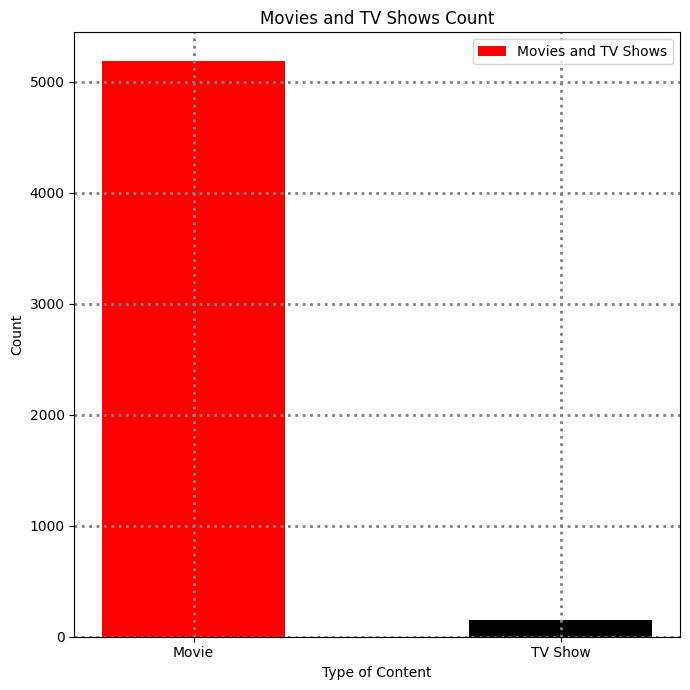

In [81]:
type_count=df['type'].value_counts()
plt.figure(figsize=(7,7))
plt.bar(type_count.index,type_count.values,color=['red','black'],width=0.5,label='Movies and TV Shows')
plt.legend(fontsize=10)
plt.title("Movies and TV Shows Count")
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.grid(color='grey',linestyle=':',linewidth=2)
plt.tight_layout()
plt.savefig('movies_tvshows.png',dpi=300,bbox_inches='tight')
plt.show()

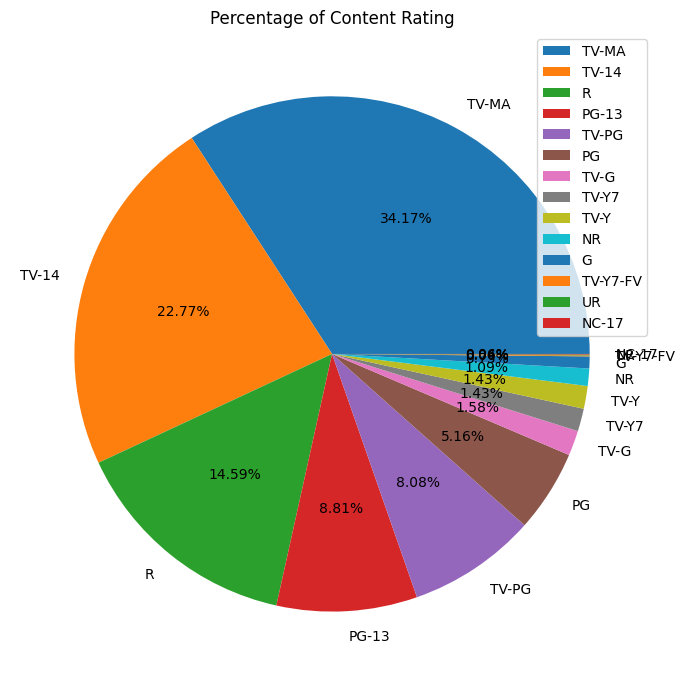

In [82]:
rating_counts=df['rating'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.2f%%')
plt.legend(fontsize=10)
plt.title("Percentage of Content Rating")
plt.tight_layout()
plt.savefig('ratings.png',dpi=300,bbox_inches='tight')
plt.show()

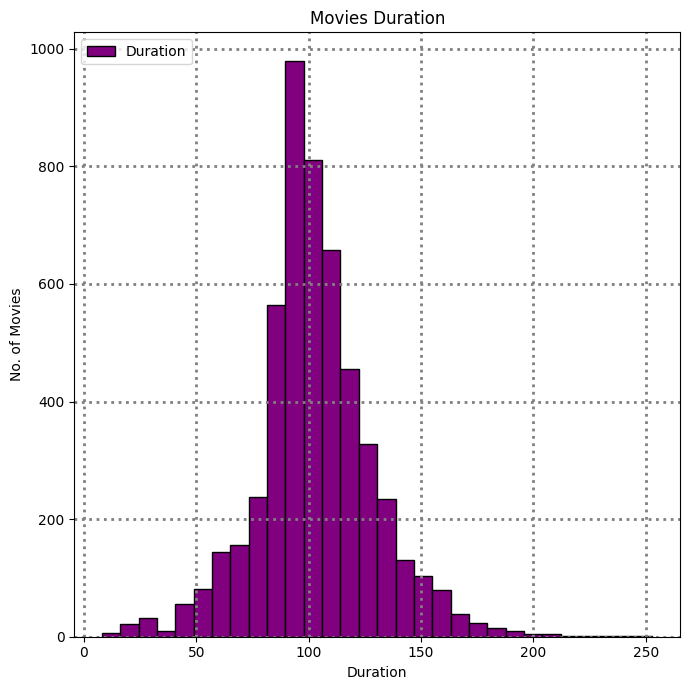

In [83]:
movies_df=df[df['type']=='Movie'].copy()
movies_df['duration']=movies_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(7,7))
plt.hist(movies_df['duration'],bins=30,color='purple',edgecolor='black',label='Duration')
plt.legend(loc='upper left',fontsize=10)
plt.title("Movies Duration")
plt.xlabel('Duration')
plt.ylabel('No. of Movies')
plt.grid(color='grey',linestyle=':',linewidth=2)
plt.tight_layout()
plt.savefig('movies_duration.png',dpi=300,bbox_inches='tight')
plt.show()

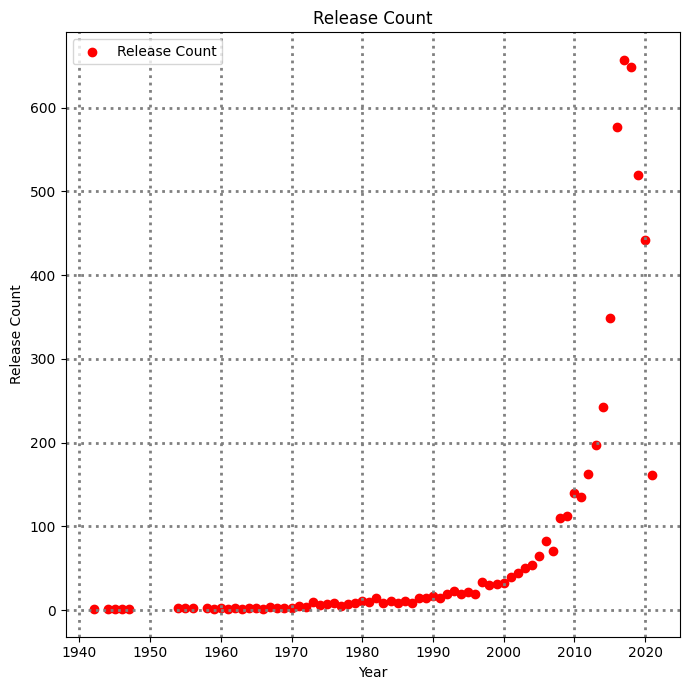

In [84]:
release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(7,7))
plt.scatter(release_counts.index,release_counts.values,color='red',label='Release Count')
plt.legend(loc='upper left',fontsize=10)
plt.title("Release Count")
plt.xlabel('Year')
plt.ylabel('Release Count')
plt.grid(color='grey',linestyle=':',linewidth=2)
plt.tight_layout()
plt.savefig('release_count.png',dpi=300,bbox_inches='tight')
plt.show()

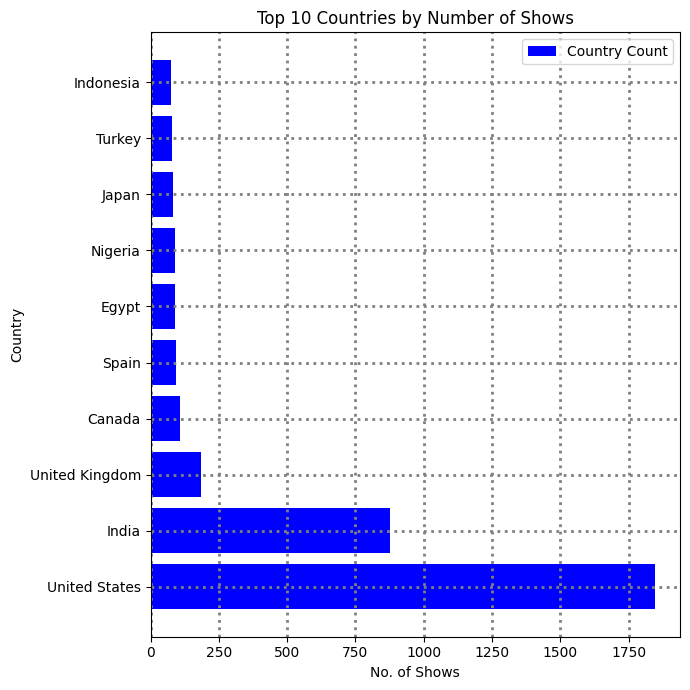

In [85]:
country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(7,7))
plt.barh(country_counts.index,country_counts.values,color='blue',label='Country Count')
plt.legend(loc='upper right',fontsize=10)
plt.title("Top 10 Countries by Number of Shows")
plt.xlabel('No. of Shows')
plt.ylabel('Country')
plt.grid(color='grey',linestyle=':',linewidth=2)
plt.tight_layout()
plt.savefig('country_count.png',dpi=300,bbox_inches='tight')
plt.show()

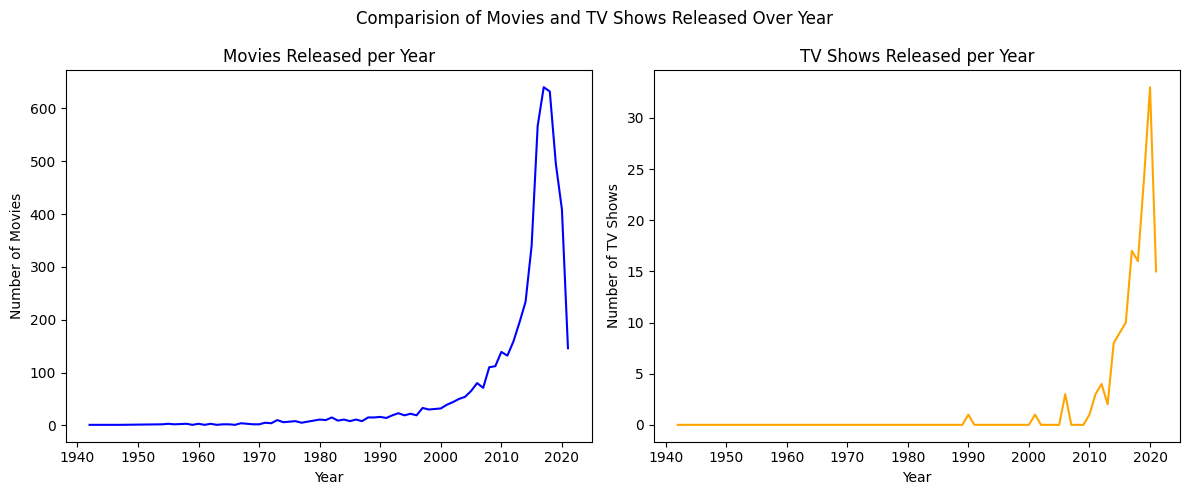

In [86]:
content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies Released per Year')
ax[0].set_ylabel('Number of Movies')
ax[0].set_xlabel('Year')

ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[1].set_title('TV Shows Released per Year')
ax[1].set_ylabel('Number of TV Shows')
ax[1].set_xlabel('Year')

fig.suptitle('Comparision of Movies and TV Shows Released Over Year')
plt.tight_layout()
plt.savefig('movie_tvshows_comparision.png',dpi=300,bbox_inches='tight')
plt.show()